**JOB-A-THON - January 2023**

Predict CLTV of a customer

In [1]:
# start by importing the basic libraries required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# store the test and train csv files into their respective variables dataframes
df1=pd.read_csv('train_BRCpofr.csv')
df2=pd.read_csv('test_koRSKBP.csv')


In [3]:
df1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
df2.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
df1.columns, df2.columns

(Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
        'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
        'cltv'],
       dtype='object'),
 Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
        'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy'],
       dtype='object'))

In [6]:
df1.shape, df2.shape

((89392, 12), (59595, 11))

In [7]:
df1.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [8]:
df2.describe()

,id,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000,59595.000000
mean,119190.000000,0.576928,4.620304,4368.504321
std,17203.738983,0.494051,2.282511,3288.132408
min,89393.000000,0.000000,0.000000,0.000000
25%,104291.500000,0.000000,3.000000,2398.000000
50%,119190.000000,1.000000,5.000000,4106.000000
75%,134088.500000,1.000000,6.000000,6104.000000
max,148987.000000,1.000000,8.000000,32534.000000


Start with some basic EDA to check for any null values

In [9]:
df1.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

We need to take care of the categorical variables as well so as to help out model predict the outcome in an efficient manner

In [11]:
X_train_one_hot = pd.get_dummies(df1,drop_first=True,sparse=False)
X_train_one_hot.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,1,1,0,0,1,0,0,1,0,0,1,0
1,2,0,8,5080,515400,1,0,1,0,1,0,0,1,0,0,1,0
2,3,1,8,2599,64212,1,1,0,0,1,0,0,1,0,0,1,0
3,4,0,7,0,97920,0,0,1,0,1,0,0,1,0,0,1,0
4,5,1,6,3508,59736,1,1,1,0,0,0,1,1,0,0,0,0


In [12]:
# Now lets create the X and y i.e. the dependent variables
X = X_train_one_hot.drop("cltv",axis = 1)
X

,id,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,1,1,0,0,1,0,0,1,0,0,1,0
1,2,0,8,5080,1,0,1,0,1,0,0,1,0,0,1,0
2,3,1,8,2599,1,1,0,0,1,0,0,1,0,0,1,0
3,4,0,7,0,0,0,1,0,1,0,0,1,0,0,1,0
4,5,1,6,3508,1,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,0,6,0,1,0,1,0,0,0,1,1,1,0,1,0
89388,89389,1,0,3897,1,1,0,0,1,0,0,1,0,0,1,0
89389,89390,0,4,3363,0,1,0,0,1,0,0,1,1,0,1,0
89390,89391,0,8,0,0,0,1,0,0,0,0,1,1,0,1,0


In [13]:
y = X_train_one_hot["cltv"]
y

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((71513, 16), (17879, 16), (71513,), (17879,))

Since we need to find the customer lifetime value (CLTV) which would be a numeric in nature we should go ahead and start with a regression based model to figure out the number

In [15]:
# Import necessary libraries
# Decision Tree approach

from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X,y)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred))
print("R2 score for validation data:", r2_score(y_test, y_test_pred))

R2 score for training data: 1.0
R2 score for validation data: 1.0


In [16]:
# Import necessary libraries
# Random Forest approach

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X,y)

y_train_pred2 = rfr.predict(X_train)
y_test_pred2 = rfr.predict(X_test)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred2))
print("R2 score for validation data:", r2_score(y_test, y_test_pred2))

R2 score for training data: 0.1461842606520053
R2 score for validation data: 0.14999485180502303


In [17]:
df2_one_hot = pd.get_dummies(df2,drop_first=True,sparse=False)
df2_one_hot.head()

,id,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,89393,0,6,2134,0,0,1,0,1,0,0,1,1,0,0,1
1,89394,0,4,4102,0,1,1,0,0,0,0,1,0,0,1,0
2,89395,1,7,2925,1,0,1,0,1,0,0,1,1,0,0,0
3,89396,1,2,0,0,0,0,0,0,0,1,1,1,0,0,1
4,89397,0,5,14059,0,1,1,0,0,0,0,1,1,0,0,1


Solution Description : Random forest regression based approach used

In [18]:
y_df2_pred_rfr = rfr.predict(df2_one_hot)
submission_df_rfr = pd.DataFrame(y_df2_pred_rfr)
sample_submission_df_rfr = pd.DataFrame()
sample_submission_df_rfr = pd.concat([sample_submission_df_rfr, df2.iloc[:,0]], axis=1)
submission_df_rfr = pd.concat([sample_submission_df_rfr, submission_df_rfr], axis=1)
submission_df_rfr.columns=['id', 'cltv']
submission_df_rfr
submission_df_rfr.to_csv("sample_submission_rfr.csv",index=False)

Solution Description : Decision tree regression based approach used

In [19]:
y_df2_pred = regressor.predict(df2_one_hot)
submission_df = pd.DataFrame(y_df2_pred)
sample_submission_df = pd.DataFrame()
sample_submission_df = pd.concat([sample_submission_df, df2.iloc[:,0]], axis=1)
submission_df = pd.concat([sample_submission_df, submission_df], axis=1)
submission_df.columns=['id', 'cltv']
submission_df.to_csv("sample_submission_dt.csv",index=False)

Solution Description : Lasso regression based approach used

In [20]:
# Import necessary libraries
# Lasso regression approach
from sklearn.metrics import r2_score
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X,y)

y_train_pred3 = lassoReg.predict(X_train)
y_test_pred3 = lassoReg.predict(X_test)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred3))
print("R2 score for validation data:", r2_score(y_test, y_test_pred3))

R2 score for training data: 0.15217278323840866
R2 score for validation data: 0.15228083877036502


Lasso regression with alpha =0.01

In [21]:
# Import necessary libraries
# Lasso regression approach
from sklearn.metrics import r2_score
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.01)
lassoReg.fit(X,y)

y_train_pred0 = lassoReg.predict(X_train)
y_test_pred0 = lassoReg.predict(X_test)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred0))
print("R2 score for validation data:", r2_score(y_test, y_test_pred0))

R2 score for training data: 0.15217281007279027
R2 score for validation data: 0.15228072907665358


In [22]:
y_df2_pred_lr2 = lassoReg.predict(df2_one_hot)
submission_df_lr2 = pd.DataFrame(y_df2_pred_lr2)
sample_submission_df_lr2 = pd.DataFrame()
sample_submission_df_lr2 = pd.concat([sample_submission_df_lr2, df2.iloc[:,0]], axis=1)
submission_df_lr2 = pd.concat([sample_submission_df_lr2, submission_df_lr2], axis=1)
submission_df_lr2.columns=['id', 'cltv']
submission_df_lr2
submission_df_lr2.to_csv("sample_submission_lr2.csv",index=False)

Solution Description : Lasso regression based approach used

In [23]:
y_df2_pred_lr = lassoReg.predict(df2_one_hot)
submission_df_lr = pd.DataFrame(y_df2_pred_lr)
sample_submission_df_lr = pd.DataFrame()
sample_submission_df_lr = pd.concat([sample_submission_df_lr, df2.iloc[:,0]], axis=1)
submission_df_lr = pd.concat([sample_submission_df_lr, submission_df_lr], axis=1)
submission_df_lr.columns=['id', 'cltv']
submission_df_lr
submission_df_lr.to_csv("sample_submission_lr.csv",index=False)

Time to proceed with our xgboost model approach!

In [24]:
# Make some additional copies of our dataframes because certain characters cannot be parsed by xgboost model
X_new = X.copy()
X_train_new = X_train.copy()
X_test_new = X_test.copy()
df2_one_hot_new = df2_one_hot.copy()

X_new.rename(columns={'income_<=2L': 'income_less_than_or_equal_to_2L'}, inplace=True)
X_train_new.rename(columns={'income_<=2L': 'income_less_than_or_equal_to_2L'}, inplace=True)
X_test_new.rename(columns={'income_<=2L': 'income_less_than_or_equal_to_2L'}, inplace=True)
df2_one_hot_new.rename(columns={'income_<=2L': 'income_less_than_or_equal_to_2L'}, inplace=True)

In [25]:
# Import necessary libraries
# xgboost regression approach
from sklearn.metrics import r2_score
import xgboost

# xgb = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb = xgboost.XGBRegressor()
xgb.fit(X_new,y)

y_train_pred4 = xgb.predict(X_train_new)
y_test_pred4 = xgb.predict(X_test_new)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred4))
print("R2 score for validation data:", r2_score(y_test, y_test_pred4))

R2 score for training data: 0.2572576689044229
R2 score for validation data: 0.2595291714400295


In [26]:
y_df2_pred_xgb = xgb.predict(df2_one_hot_new)
submission_df_xgb = pd.DataFrame(y_df2_pred_xgb)
sample_submission_df_xgb = pd.DataFrame()
sample_submission_df_xgb = pd.concat([sample_submission_df_xgb, df2.iloc[:,0]], axis=1)
submission_df_xgb = pd.concat([sample_submission_df_xgb, submission_df_xgb], axis=1)
submission_df_xgb.columns=['id', 'cltv']
submission_df_xgb
submission_df_xgb.to_csv("sample_submission_xgb.csv",index=False)

Parameter change in xgboost model to increase score

In [79]:
X_train_new.columns, X_train_new.shape

(Index(['id', 'marital_status', 'vintage', 'claim_amount', 'gender_Male',
        'area_Urban', 'qualification_High School', 'qualification_Others',
        'income_5L-10L', 'income_less_than_or_equal_to_2L',
        'income_More than 10L', 'num_policies_More than 1', 'policy_B',
        'policy_C', 'type_of_policy_Platinum', 'type_of_policy_Silver'],
       dtype='object'),
 (71513, 16))

In [27]:
# Import necessary libraries
# xgboost regression approach
from sklearn.metrics import r2_score
import xgboost

xgb2 = xgboost.XGBRegressor(n_estimators=1000,learning_rate=0.01, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# xgb = xgboost.XGBRegressor()
xgb2.fit(X_new,y)

y_train_pred5 = xgb2.predict(X_train_new)
y_test_pred5 = xgb2.predict(X_test_new)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred5))
print("R2 score for validation data:", r2_score(y_test, y_test_pred5))

R2 score for training data: 0.22880939980516446
R2 score for validation data: 0.22546056413144444


In [28]:
y_df2_pred_xgb2 = xgb2.predict(df2_one_hot_new)
submission_df_xgb2 = pd.DataFrame(y_df2_pred_xgb2)
sample_submission_df_xgb2 = pd.DataFrame()
sample_submission_df_xgb2 = pd.concat([sample_submission_df_xgb2, df2.iloc[:,0]], axis=1)
submission_df_xgb2 = pd.concat([sample_submission_df_xgb2, submission_df_xgb2], axis=1)
submission_df_xgb2.columns=['id', 'cltv']
submission_df_xgb2
submission_df_xgb2.to_csv("sample_submission_xgb2.csv",index=False)

Firgure out the correlation between features by taking notes on a correlation graph below

                      id  marital_status   vintage  claim_amount
id              1.000000       -0.003399  0.003059      0.002468
marital_status -0.003399        1.000000 -0.009528     -0.110682
vintage         0.003059       -0.009528  1.000000      0.004936
claim_amount    0.002468       -0.110682  0.004936      1.000000


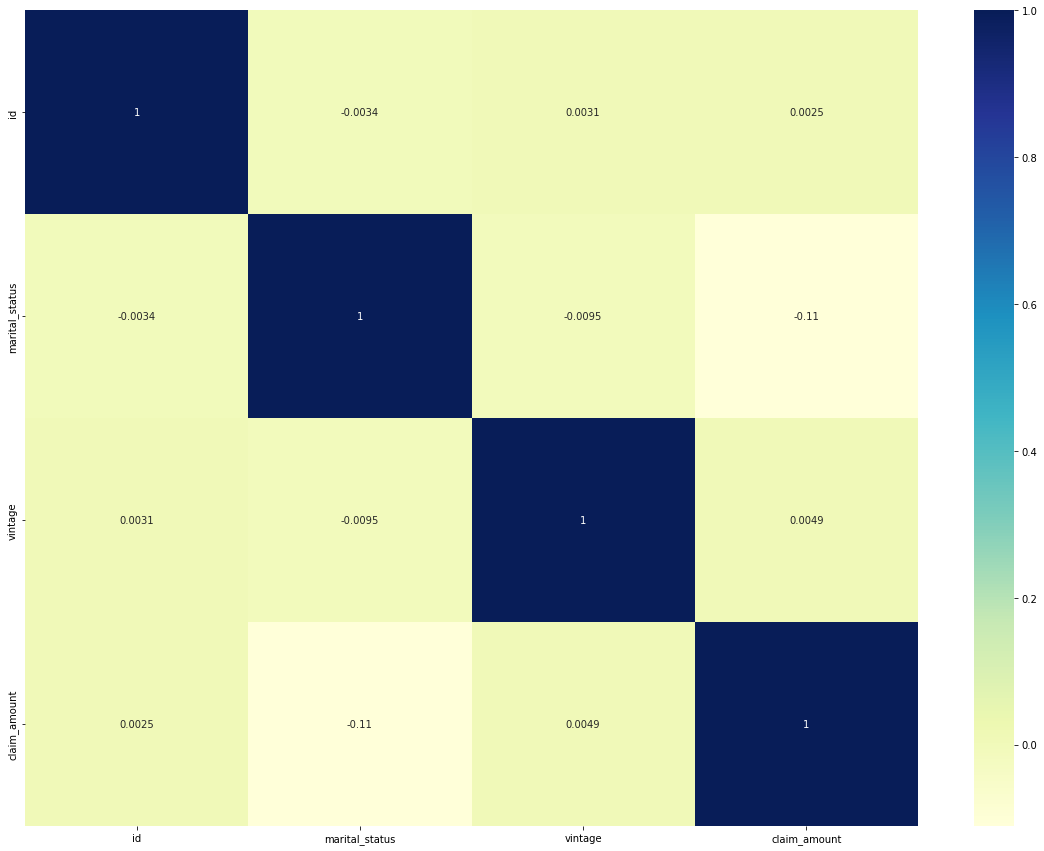

In [30]:
import seaborn as sb

fig = plt.figure(figsize = (20,15))
print(df2.corr())

dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
plt.show()

Lets use a Neural Net as another approach to solve this problem statement

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [38]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 167,041
Trainable params: 167,041
Non-trainable params: 0
_________________________________________________________________


In [40]:
NN_model.fit(X_new, y, epochs=20, batch_size=32, validation_split = 0.2)

Epoch 1/20
2235/2235 [==============================] - 17s 8ms/step - loss: 46321.2344 - mean_absolute_error: 46321.2344 - val_loss: 49359.5625 - val_mean_absolute_error: 49359.5625
Epoch 2/20
2235/2235 [==============================] - 16s 7ms/step - loss: 46151.7188 - mean_absolute_error: 46151.7188 - val_loss: 48362.3125 - val_mean_absolute_error: 48362.3125
Epoch 3/20
2235/2235 [==============================] - 22s 10ms/step - loss: 46298.2344 - mean_absolute_error: 46298.2344 - val_loss: 46072.8711 - val_mean_absolute_error: 46072.8711
Epoch 4/20
2235/2235 [==============================] - 29s 13ms/step - loss: 46175.4219 - mean_absolute_error: 46175.4219 - val_loss: 47522.7109 - val_mean_absolute_error: 47522.7109
Epoch 5/20
2235/2235 [==============================] - 18s 8ms/step - loss: 46244.8242 - mean_absolute_error: 46244.8242 - val_loss: 47076.0664 - val_mean_absolute_error: 47076.0664
Epoch 6/20
2235/2235 [==============================] - 20s 9ms/step - loss: 46160.

In [42]:
y_df2_pred_nn = NN_model.predict(df2_one_hot)

submission_df_nn = pd.DataFrame(y_df2_pred_nn)
sample_submission_df_nn = pd.DataFrame()
sample_submission_df_nn = pd.concat([sample_submission_df_nn, df2.iloc[:,0]], axis=1)
submission_df_nn = pd.concat([sample_submission_df_nn, submission_df_nn], axis=1)
submission_df_nn.columns=['id', 'cltv']
submission_df_nn
submission_df_nn.to_csv("sample_submission_nn.csv",index=False)

Similar heatmap created here as above but after one hot encoding so as to see the dependence of all the features and not just the numerical ones

<AxesSubplot:>

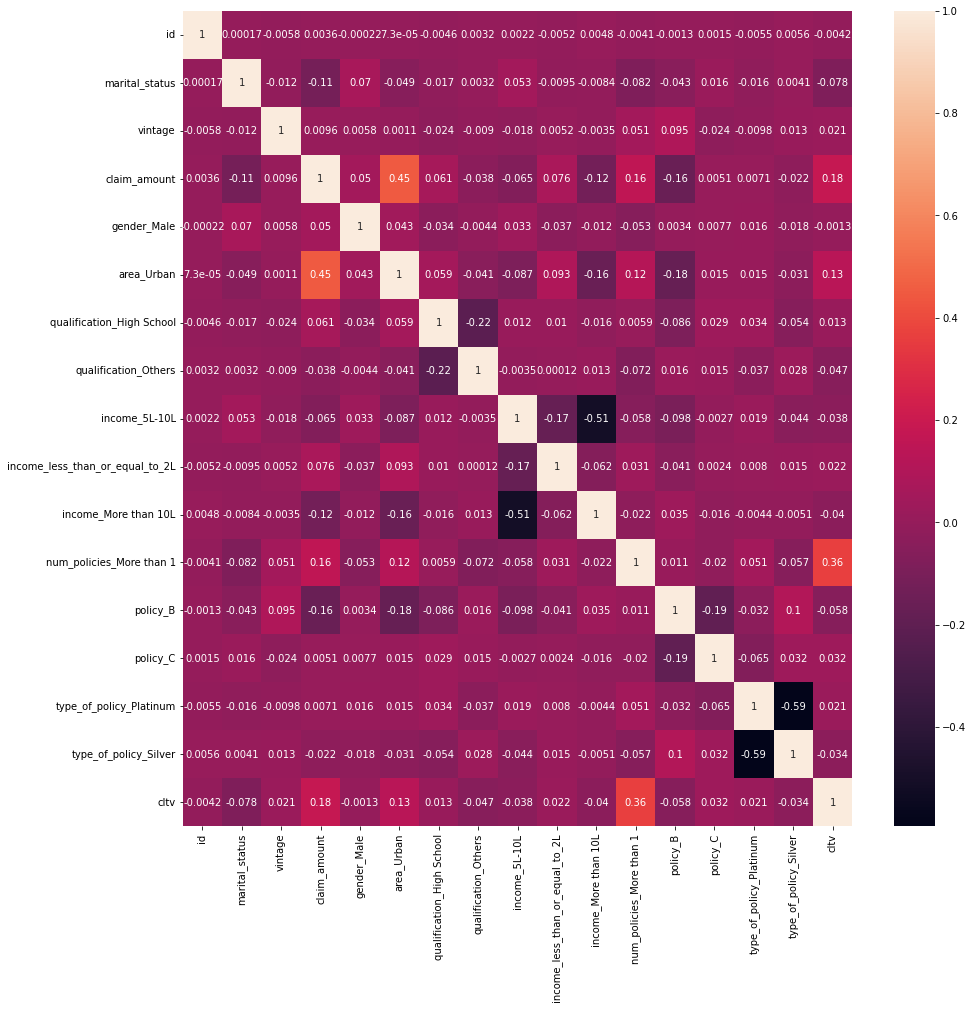

In [56]:
X_new_all = X_new.copy()
X_new_all['cltv'] = df1.iloc[:,-1]

plt.figure(figsize=(15, 15))
sb.heatmap(X_new_all.corr(), annot=True)

In [59]:
#Drop 1 unrequired column here
X_new_all_drop_id = X_new_all.copy()
X_new_all_drop_id = X_new_all_drop_id.drop(['id'], axis=1)
X_new_all_drop_id.columns

Index(['marital_status', 'vintage', 'claim_amount', 'gender_Male',
       'area_Urban', 'qualification_High School', 'qualification_Others',
       'income_5L-10L', 'income_less_than_or_equal_to_2L',
       'income_More than 10L', 'num_policies_More than 1', 'policy_B',
       'policy_C', 'type_of_policy_Platinum', 'type_of_policy_Silver', 'cltv'],
      dtype='object')

In [65]:
X_train_new_no_id = X_train_new.copy()
X_train_new_no_id = X_train_new_no_id.drop(['id'], axis=1)
X_train_new_no_id.head()

X_test_new_no_id = X_test_new.copy()
X_test_new_no_id = X_test_new_no_id.drop(['id'], axis=1)
X_test_new_no_id.head()

,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_less_than_or_equal_to_2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
10600,1,5,3867,0,1,1,0,1,0,0,1,0,0,1,0
47569,0,2,5466,0,1,1,0,1,0,0,0,0,0,1,0
17246,1,5,2505,1,1,0,0,0,0,1,0,0,0,0,1
71237,1,8,0,0,0,1,0,1,0,0,1,0,0,0,0
64437,0,1,6643,0,1,1,0,1,0,0,1,0,0,0,1


In [69]:
df2_one_hot_new_no_id = df2_one_hot.copy()
df2_one_hot_new_no_id = df2_one_hot_new_no_id.drop(['id'], axis=1)

df2_one_hot_new_drop_id_and_policy_more_1 = df2_one_hot.copy()
df2_one_hot_new_drop_id_and_policy_more_1 = df2_one_hot_new_drop_id_and_policy_more_1.drop(['id'], axis=1)

Try modifying the dataframe of train data to drop unncessary columns

In [67]:
# The code below takes 8 mins to run. Uncomment to run only if needed
# Import necessary libraries
# xgboost regression approach


from sklearn.metrics import r2_score
import xgboost

xgb4 = xgboost.XGBRegressor(n_estimators=10000,learning_rate=0.01, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb4.fit(X_new_all_drop_id,y)

y_train_pred7 = xgb4.predict(X_train_new_no_id)
y_test_pred7 = xgb4.predict(X_test_new)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred7))
print("R2 score for validation data:", r2_score(y_test, y_test_pred7))


y_df2_pred_xgb4 = xgb4.predict(df2_one_hot_new_no_id)
submission_df_xgb4 = pd.DataFrame(y_df2_pred_xgb4)
sample_submission_df_xgb4 = pd.DataFrame()
sample_submission_df_xgb4 = pd.concat([sample_submission_df_xgb4, df2.iloc[:,0]], axis=1)
submission_df_xgb4 = pd.concat([sample_submission_df_xgb4, submission_df_xgb4], axis=1)
submission_df_xgb4.columns=['id', 'cltv']
submission_df_xgb4.to_csv("sample_submission_xgb4.csv",index=False)

ValueError: Feature shape mismatch, expected: 16, got 15

In [81]:
#Drop 2 unrequired columns here
X_new_all_drop_id_and_policy_more_1 = X_new_all.copy()
X_new_all_drop_id_and_policy_more_1 = X_new_all_drop_id_and_policy_more_1.drop(['id', 'num_policies_More than 1', 'cltv'], axis=1)
X_new_all_drop_id_and_policy_more_1.columns

X_train_new_no_id_no_policy_more_1 = X_train_new.copy()
X_train_new_no_id_no_policy_more_1 = X_train_new_no_id_no_policy_more_1.drop(['id', 'num_policies_More than 1'], axis=1)

X_test_new_no_id_no_policy_more_1 = X_test_new.copy()
X_test_new_no_id_no_policy_more_1 = X_test_new_no_id_no_policy_more_1.drop(['id', 'num_policies_More than 1'], axis=1)

In [83]:
# The code below takes 8 mins to run. Uncomment to run only if needed
# Import necessary libraries
# xgboost regression approach


from sklearn.metrics import r2_score
import xgboost

xgb5 = xgboost.XGBRegressor(n_estimators=10000,learning_rate=0.01, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb5.fit(X_new_all_drop_id_and_policy_more_1,y)

y_train_pred8 = xgb5.predict(X_train_new_no_id_no_policy_more_1)
y_test_pred8 = xgb5.predict(X_test_new_no_id_no_policy_more_1)

# Print the R2 score for the training and validation sets
print("R2 score for training data:", r2_score(y_train, y_train_pred8))
print("R2 score for validation data:", r2_score(y_test, y_test_pred8))


y_df2_pred_xgb5 = xgb5.predict(df2_one_hot_new_drop_id_and_policy_more_1)
submission_df_xgb5 = pd.DataFrame(y_df2_pred_xgb5)
sample_submission_df_xgb5 = pd.DataFrame()
sample_submission_df_xgb5 = pd.concat([sample_submission_df_xgb5, df2.iloc[:,0]], axis=1)
submission_df_xgb5 = pd.concat([sample_submission_df_xgb5, submission_df_xgb5], axis=1)
submission_df_xgb5.columns=['id', 'cltv']
submission_df_xgb5.to_csv("sample_submission_xgb5.csv",index=False)

R2 score for training data: 0.3641950808169634
R2 score for validation data: 0.3560538954474599


ValueError: Feature shape mismatch, expected: 14, got 15